In [141]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Capturando dados

In [120]:
dataset = pd.read_csv("vale3.csv")

### Criando a coluna do fechamento de amanhã

In [121]:
dataset[['close_tomorrow']] = dataset[['Price']].shift(-1)

### Removendo dados nulos

In [122]:
dataset = dataset.dropna(axis=0)

### Deixando o volume com dados flutuantes

In [123]:
volumes = []
for volume in dataset['Vol.']:
    if 'M' in volume:
        volume = float(volume.replace('M',''))*1000000
    elif 'K' in volume:
        volume = float(volume.replace('K',''))*1000
    volumes.append(volume)


### Convertendo a lista para um objeto Series para ser usado no model

In [124]:
dataset['Vol.'] = pd.Series(volumes)

In [125]:
dataset = dataset.dropna(axis=0)

### Definindo a nossa coluna target

In [126]:
y = dataset.close_tomorrow

### Definindo as nossas colunas de entrada

In [127]:
dataset_features = ['Price', 'Open','Vol.']

In [128]:
X = dataset[dataset_features]

### Separando o dataset entre treinamento e teste

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0) 

### Criando uma Árvore de decisão como modelo

In [142]:
vale_model = DecisionTreeRegressor(random_state=1)
#vale_model = RandomForestRegressor(random_state=1)

### Treinando o nosso modelo

In [143]:
vale_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

### Fazendo predição com os dados de testes

In [144]:

print("The predictions are")
y_predicted = vale_model.predict(X_test)
print(y_predicted)


The predictions are
[ 2.9818 12.9601  8.275  ...  3.3831 22.8784 22.2456]
MAE
Value: 0.1681941463414636


### USando a métrica MAE para avaliar o modelo

In [ ]:
print("MAE")
mae = mean_absolute_error(y_test, y_predicted)
print("Value:",mae)

### Plotando o gráfico para ver a diferença entre a predição e o real

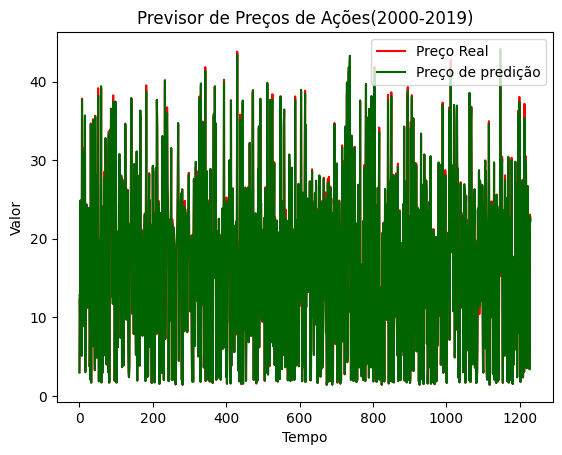

In [145]:
plt.plot(pd.array(y_test), color = 'red',label = 'Preço Real')
plt.plot(y_predicted, color = 'darkgreen', label="Preço de predição")
plt.title('Previsor de Preços de Ações(2000-2019)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()